In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from pandas import DataFrame

In [28]:
dataframe=pd.read_csv("final.csv")

In [29]:
X=dataframe.iloc[:,2:5].values
y=dataframe.iloc[:,5]

In [30]:
Labelencoder_X=LabelEncoder()
X[:,1]=Labelencoder_X.fit_transform(X[:,1])

In [31]:
ct = ColumnTransformer([("encoder", OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)

#avoiding the dummy variable trap
X=X[:,1:]

In [32]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
forest_model = RandomForestRegressor(n_estimators=1000,random_state=1)
forest_model.fit(Xtrain, ytrain)
preds = forest_model.predict(Xtest)
print(mean_absolute_error(ytest, preds))

16.080752521223417


Text(0, 0.5, 'yield per hectre in tonnes')

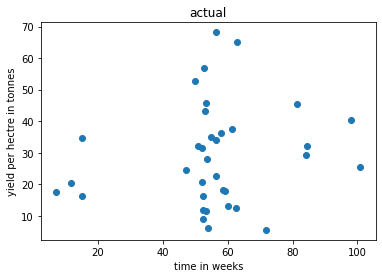

In [34]:
plt.scatter(Xtest[:,3],ytest)
plt.title("actual")
plt.xlabel("time in weeks")
plt.ylabel("yield per hectre in tonnes")

Text(0, 0.5, 'yield per hectre in tonnes')

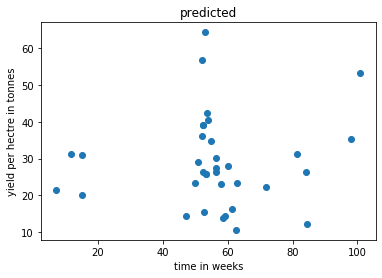

In [35]:
plt.scatter(Xtest[:,3],preds)
plt.title("predicted")
plt.xlabel("time in weeks")
plt.ylabel("yield per hectre in tonnes")

In [36]:
ytest=np.array(ytest)

In [37]:
preds

array([21.41802233, 26.38331713, 35.26265633, 31.14104667, 42.33235688,
       22.96092516, 22.13744597, 29.12465923, 34.71668652, 39.23782848,
       20.06418233, 14.19012337, 30.12251543, 56.88518791, 31.18446217,
       14.30989428, 30.99804867, 13.67538956, 27.32963028, 16.33853414,
       26.28925663, 40.56882779, 25.74583386, 39.23782848, 25.74583386,
       10.54458361, 27.91070307, 23.24919187, 64.41207683, 53.32425174,
       15.39236603, 23.37916942, 12.09922461, 26.25206802, 36.00715503])

Text(0, 0.5, 'no of farmers')

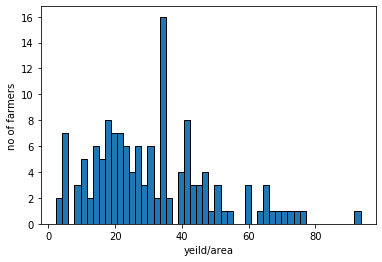

In [38]:
plt.hist(ytrain,bins=50,ec='black')
plt.xlabel('yeild/area')
plt.ylabel('no of farmers')

Text(0.5, 1.0, 'actual')

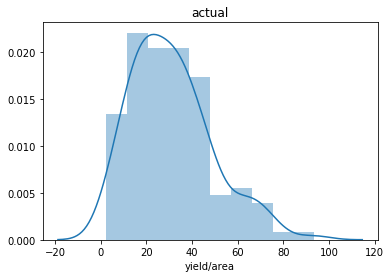

In [39]:
sns.distplot(ytrain)
plt.title("actual")

0.10210548478935279

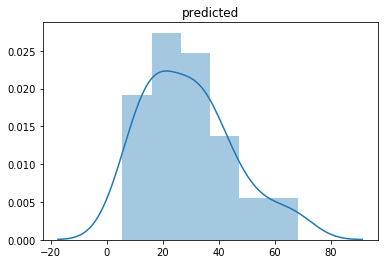

In [40]:
sns.distplot(ytest)
plt.title("predicted")
dataframe['yield/area'].corr(dataframe['Crop age in Weeks'])

In [41]:
dataframe.head()

,Tonns [Yield],AREA [Acres],VARIETY [Gene Type],"Crop TYPE\n[PL, R1, R2]",Crop age in Weeks,yield/area
0,84.615,2.00,86032,R2,52.6,42.307500
1,24.334,0.62,86032,R2,52.4,39.248387
2,47.025,0.63,86032,R2,52.0,74.642857
3,41.431,1.00,86032,PL,52.9,41.431000
4,17.345,3.00,86032,R2,56.3,5.781667


In [42]:
dataframe.corr()

,Tonns [Yield],AREA [Acres],Crop age in Weeks,yield/area
Tonns [Yield],1.000000,0.485527,0.121420,0.629365
AREA [Acres],0.485527,1.000000,-0.035370,-0.252097
Crop age in Weeks,0.121420,-0.035370,1.000000,0.102105
yield/area,0.629365,-0.252097,0.102105,1.000000


In [43]:
regr = LinearRegression()
regr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
pred2=regr.predict(Xtest)
print(mean_absolute_error(ytest, pred2))

13.026257309778492


Text(0, 0.5, 'yield per hectre in tonnes')

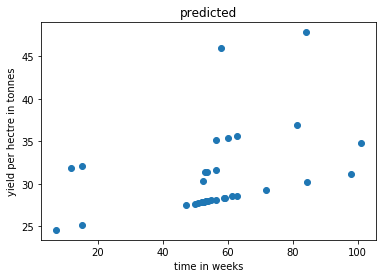

In [45]:
plt.scatter(Xtest[:,3],pred2)
plt.title("predicted")
plt.xlabel("time in weeks")
plt.ylabel("yield per hectre in tonnes")

Text(0, 0.5, 'yield per hectre in tonnes')

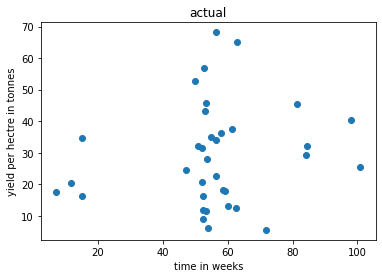

In [46]:
plt.scatter(Xtest[:,3],ytest)
plt.title("actual")
plt.xlabel("time in weeks")
plt.ylabel("yield per hectre in tonnes")

In [47]:
Xtrain=pd.DataFrame(data=Xtrain)
pd.DataFrame(data=regr.coef_,index=Xtrain.columns)

,0
0,10.702217
1,2.470436
2,-3.481031
3,0.072234


### data transformation

In [48]:
dataframe['yield/area'].skew()

0.8196328902266506